<a href="https://colab.research.google.com/github/silverleaf321/BCA-project-CS-Salaries/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

Import the cleaned dataset. Dataset cleaning can be found in data_cleanup.py and data_clean_with_dummies.py files

In [1]:
import pandas as pd

path = "/content/Salary_Data_cleaned.csv"
df = pd.read_csv(path)

In [2]:
from sklearn.model_selection import train_test_split

y = df["Salary"]
X = df.drop(columns=["Salary"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
train_data = X_train.copy()
train_data['Salary'] = y_train

train_data = train_data.dropna(subset=['Salary'])
X_train = train_data.drop(columns=['Salary'])
y_train = train_data['Salary']

## Linear Regression

Used as a baseline model

In [4]:
# linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.7607998400275326

## Grid Search CV

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

model = XGBRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

45441792.91581065


<ipython-input-6-5c547153c493>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Salary')


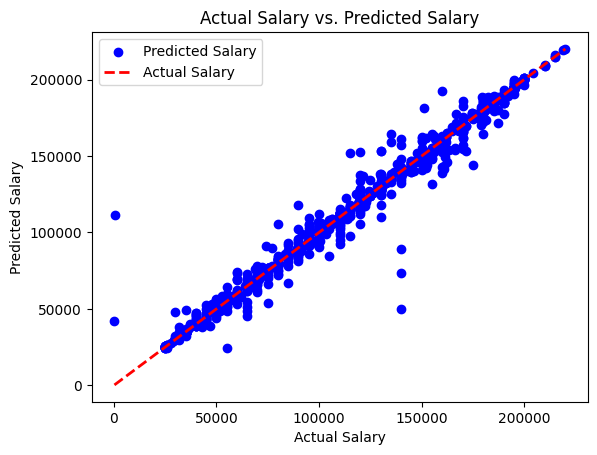

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicted Salary')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs. Predicted Salary')
plt.legend()
plt.show()

## XGB Regression

In [7]:
# xgb regression

from xgboost.sklearn import XGBRegressor
from sklearn.impute import SimpleImputer
import xgboost as xgb

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
imputer = SimpleImputer(strategy = "mean")
y_pred_imputed = imputer.fit_transform(y_pred.reshape(-1, 1)).flatten()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_imputed)
print("Mean Squared Error:", mse)

Mean Squared Error: 49903904.96024735


<ipython-input-16-81660eb471c5>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Salary')


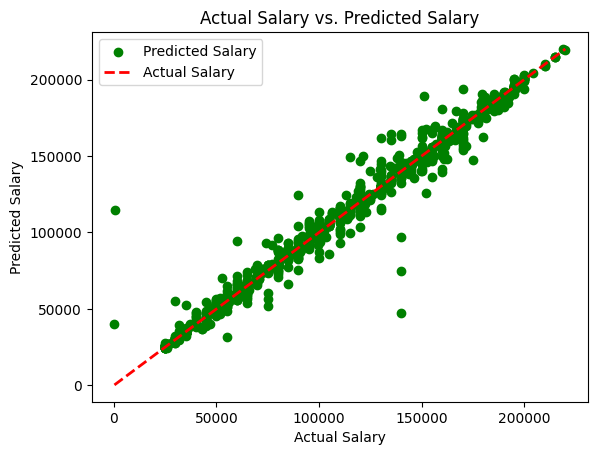

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='green', label='Predicted Salary')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs. Predicted Salary')
plt.legend()
plt.show()

## Logistic Regression
this is for classification

In [8]:
# # logistic regression - actually for classification, hence why it doesn't work

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter = 200)
# model.fit(X, y)
# model.score(X, y)

## Decision Tree

In [9]:
# decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

# random forest might get an even better score

49903904.96024735
0.9813254167523859


## Random Forest

In [21]:
def GridSearch(model, params):
  grid_reg = GridSearchCV(model, params, scoring = 'neg_mean_absolute_error')
  grid_reg.fit(X_train, y_train)

  best_params =  grid_reg.best_params_

  scores = grid_reg.best_score_
  return scores

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
params = {'max_depth': [5],'n_estimators':[20]}
print(GridSearch(RandomForestRegressor(), params))

-10003.860348340777


<ipython-input-23-b7d79816f025>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Salary')


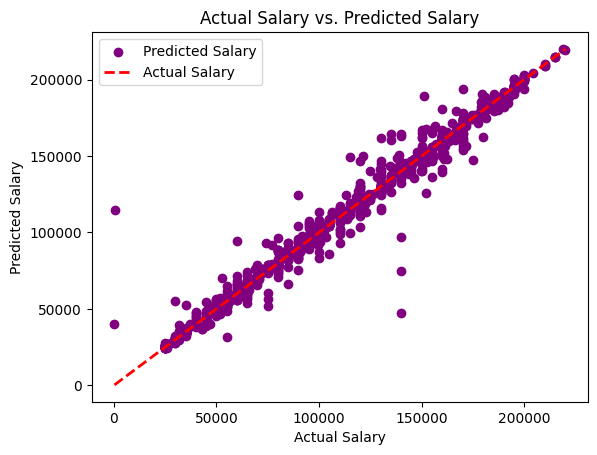

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='purple', label='Predicted Salary')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs. Predicted Salary')
plt.legend()
plt.show()

## Confusion Matrix
actually this is for classification
so disregard this


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# plt.show()